In [1]:
import sys
sys.path.append('../src') # include the src directory


In [2]:
import pandas as pd
from visualization import plot_label_distribution


In [3]:
raw_file_path = '../data/raw/amyloid-raw-21-07-2025.csv'
raw_df = pd.read_csv(raw_file_path)
raw_df.head()

,PMID,Rejection?,If so; reason to reject?,Other? Expand,No access to full-text,Decided by what?,URL,Year,Year.1,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,39441361,Rejected,(Pre)Clinical trials. No interaction or amyloi...,NaN,NaN,NaN,https://pubmed.ncbi.nlm.nih.gov/39441361/,2025,NaN,NaN,NaN,Open questions:,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,39438925,Rejected,Not enough experimental data,NaN,NaN,read whole paper,https://pubmed.ncbi.nlm.nih.gov/39438925/,NaN,NaN,NaN,NaN,1) How do we consider an antibody used to dete...,NaN,Not enough experimental data. Same for isolati...,NaN,NaN,NaN,NaN,NaN
2,39438516,Rejected,"The interactor is not an Ab, Unknown antibody ...",NaN,NaN,NaN,https://pubmed.ncbi.nlm.nih.gov/39438516/,NaN,NaN,NaN,NaN,2) What about Pre-prints?,NaN,No to pre-prints,NaN,NaN,NaN,NaN,NaN
3,39434125,Rejected,There are no interactions described,NaN,NaN,NaN,https://pubmed.ncbi.nlm.nih.gov/39434125/,NaN,NaN,NaN,NaN,3) Non-English papers? I would trust automatic...,NaN,No to Non-Englishs,NaN,NaN,NaN,NaN,NaN
4,39432414,Rejected,Review article,NaN,NaN,Only abstract,https://pubmed.ncbi.nlm.nih.gov/39432414/,NaN,NaN,NaN,NaN,4) There are doubles. Excluding them?,NaN,Remove them,NaN,NaN,NaN,NaN,NaN


In [4]:
raw_df['Rejection?'].unique()

array(['Rejected', 'Useful', nan, '?'], dtype=object)

In [5]:
file_path = '../data/processed/amyloid-21-07-2025.csv'
df = pd.read_csv(file_path)
df.head()



,PMID,rejection,reason,decision,Title,Abstract,Authors,Journal,References
0,39441361,Rejected,(Pre)Clinical trials. No interaction or amyloi...,NaN,Monoclonal anti-amyloid antibody treatment: th...,The development of monoclonal anti-amyloid ant...,"['Lee S', 'Stögmann E']",Wiener klinische Wochenschrift,"['36449413', '33720637', '35652476', '31205802..."
1,39438925,Rejected,Not enough experimental data,read whole paper,Blockade of brain alkaline phosphatase efficie...,Alzheimer's disease (AD) is the most prevalent...,"['Soria-Tobar L', 'Román-Valero L', 'Sebastián...",Alzheimer's research & therapy,"['11520930', '11274343', '12824062', '9530504'..."
2,39438516,Rejected,"The interactor is not an Ab, Unknown antibody ...",NaN,Thioflavin-T: application as a neuronal body a...,Thioflavin-T (THT) is a common and indispensab...,"['Min JH', 'Sarlus H', 'Oasa S', 'Harris RA']",Scientific reports,"['20399286', '30108983', '28280572', '2729542'..."
3,39434125,Rejected,There are no interactions described,NaN,Amyloid-β (Aβ) immunotherapy induced microhemo...,Anti-amyloid-β (Aβ) immunotherapy trials have ...,"['Taylor X', 'Noristani HN', 'Fitzgerald GJ', ...",Molecular neurodegeneration,"['3159021', '33720637', '36449413', '35542991'..."
4,39426463,Rejected,Not enough experimental data,NaN,Early divergent modulation of NLRP2's and NLRP...,"Alzheimer's disease (AD), the most prevalent h...","['Chiarini A', 'Armato U', 'Gui L', 'Yin M', '...",Brain research,[]


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PMID        1601 non-null   int64 
 1   rejection   1601 non-null   object
 2   reason      1482 non-null   object
 3   decision    1425 non-null   object
 4   Title       1601 non-null   object
 5   Abstract    1586 non-null   object
 6   Authors     1601 non-null   object
 7   Journal     1601 non-null   object
 8   References  1601 non-null   object
dtypes: int64(1), object(8)
memory usage: 112.7+ KB


In [7]:
# ...existing code...

# Sprawdź ile wierszy w df['References'] ma puste listy lub jest puste
empty_refs = df['References'].isna() | (df['References'].astype(str).str.strip() == '') | (df['References'].astype(str).str.strip() == '[]')
print("Liczba wierszy z pustymi referencjami:", empty_refs.sum())
# ...existing code...

Liczba wierszy z pustymi referencjami: 506


In [8]:
# ...existing code...

# Sprawdź i pokaż wiersze, gdzie References są puste lub pusta lista
empty_refs = df['References'].isna() | (df['References'].astype(str).str.strip() == '') | (df['References'].astype(str).str.strip() == '[]')
print("Liczba wierszy z pustymi referencjami:", empty_refs.sum())
print(df[empty_refs])


#

Liczba wierszy z pustymi referencjami: 506
          PMID rejection                                             reason  \
4     39426463  Rejected                       Not enough experimental data   
8     39401639  Rejected                       Unknown antibody type, Other   
9     39392894  Rejected                       Not enough experimental data   
10    39392622  Rejected  The interactor is not an amyloid protein, Not ...   
11    39371133  Rejected                                          Pre-print   
...        ...       ...                                                ...   
1590  28635419  Rejected                       Not enough experimental data   
1591  28605435  Rejected                                              Other   
1592  28334940  Rejected                       Not enough experimental data   
1595  25601851  Rejected                       Not enough experimental data   
1600  21067847    Useful                                                NaN   

        

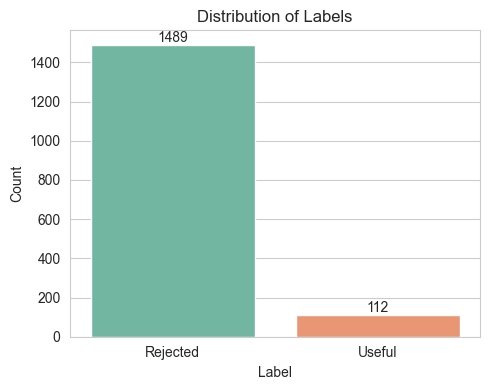

In [11]:
plot_label_distribution(df, 'rejection', title='Distribution of Labels', xlabel="Label", figsize=(5 ,4))

In [11]:
counts = df['rejection'].value_counts()/len(df)
counts

rejection
Rejected    0.925509
Useful      0.074491
Name: count, dtype: float64